In [6]:
import pandas as pd
from glob import glob
import os
#country_code = 'US'
#path_to_data = '/scratch/spf248/twitter/data'
training_data = pd.read_pickle('/home/manuto/Documents/world_bank/bert_twitter_labor/data/labels.pkl')
training_data.head()

,tweet_id,text,is_unemployed,job_loss,job_search,is_hired,job_offer
0,470867540739383296,Is it true? 47% of Unemployed Americans Have J...,no,no,no,no,no
1,360093342517837824,"Unemployed, Under-Employed, Unhappily Employed...",no,no,no,no,yes
2,458751933139132417,Currently Unemployed and Looking to Expand you...,no,no,no,no,no
3,703677501579497472,Been unemployed for awhile? Contracting can he...,no,no,no,no,yes
4,375336349336739840,"Unemployed, Under-Employed, Unhappily Employed...",no,no,no,no,yes


In [7]:
training_data.columns = ['tweet_id','text', "is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]
training_data[["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]] = training_data[["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]].replace('yes', 1)
training_data[["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]] = training_data[["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]].replace('no', 0)

In [8]:
training_data['text'] = training_data['text'].str.replace(',', '')
training_data['text'] = training_data['text'].str.replace("'","")
training_data['text'] = training_data['text'].str.replace('"','')
training_data['text'] = training_data['text'].str.replace('\n','',regex=True)
training_data['text'] = training_data['text'].str.replace('\r','',regex=True) # very important! apparently another way to create newlines that confuses the csv reader later!

#import pickle
#pickle.dump( training_data, open( "./training_data_march6.pkl", "wb" ) )


training_data

,tweet_id,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,470867540739383296,Is it true? 47% of Unemployed Americans Have J...,0,0,0,0,0
1,360093342517837824,Unemployed Under-Employed Unhappily Employed? ...,0,0,0,0,1
2,458751933139132417,Currently Unemployed and Looking to Expand you...,0,0,0,0,0
3,703677501579497472,Been unemployed for awhile? Contracting can he...,0,0,0,0,1
4,375336349336739840,Unemployed Under-Employed Unhappily Employed? ...,0,0,0,0,1
...,...,...,...,...,...,...,...
9741,797318517544472576,Is it sad or hilarious that the law firm that ...,0,0,0,0,0
9742,359578298692538368,Brandon is fired for trying to trade @LexieGor...,0,0,0,0,0
9743,613045785211437056,Jessica got fired from being a Lobbyist and Im...,0,0,0,0,0
9744,494856317224620032,Any of my 🐥 followers need a job? I got two po...,0,0,0,0,1


In [9]:
# training_data['id'] = training_data.index
training_data.index.name='id'
# training_data = training_data.reset_index(drop=True)
training_data.reset_index(inplace=True)
training_data

,id,tweet_id,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,0,470867540739383296,Is it true? 47% of Unemployed Americans Have J...,0,0,0,0,0
1,1,360093342517837824,Unemployed Under-Employed Unhappily Employed? ...,0,0,0,0,1
2,2,458751933139132417,Currently Unemployed and Looking to Expand you...,0,0,0,0,0
3,3,703677501579497472,Been unemployed for awhile? Contracting can he...,0,0,0,0,1
4,4,375336349336739840,Unemployed Under-Employed Unhappily Employed? ...,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9741,9741,797318517544472576,Is it sad or hilarious that the law firm that ...,0,0,0,0,0
9742,9742,359578298692538368,Brandon is fired for trying to trade @LexieGor...,0,0,0,0,0
9743,9743,613045785211437056,Jessica got fired from being a Lobbyist and Im...,0,0,0,0,0
9744,9744,494856317224620032,Any of my 🐥 followers need a job? I got two po...,0,0,0,0,1


is_unemployed [0 1]
lost_job_1mo [0 1]
job_search [0 1]
is_hired_1mo [0 1]
job_offer [0 1]


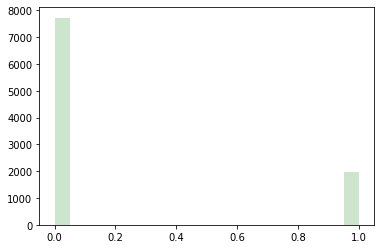

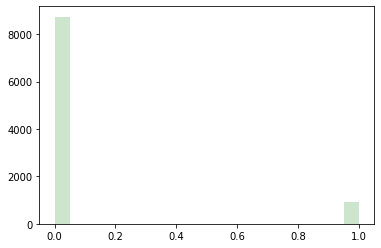

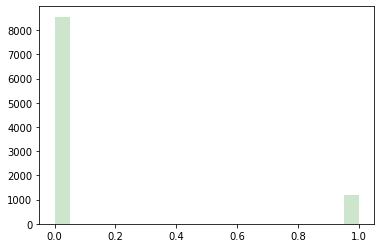

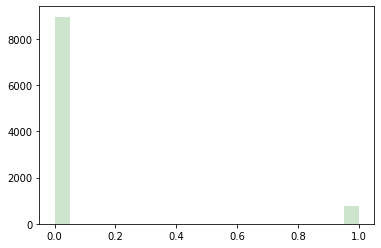

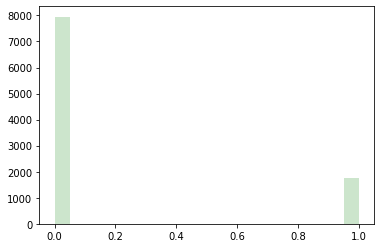

In [10]:
# unbalanced histogram data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
for column in ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]:
#     training_data_temp = training_data
#     print(column)
    training_data_temp = training_data[training_data[column] != 'unsure']
    print(column, pd.unique(training_data_temp[column]))
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(training_data_temp[column], bins=20, density = False, color = 'green', alpha = 0.2)
#     plt.hist(merged['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
# #     plt.hist(merged['neg'], bins=20, density = True, color = 'green', alpha = 0.2)
#     plt.hist(merged['neg_model'], bins=20, density = True, color = 'blue', alpha = 0.2)
#     ax.set_yscale('log')

#     # plt..yscale(value)
#     plt.title(column)
    

is_unemployed num_pos 1955 num_neg 7724 neg_data_sample (1955, 3) (3910, 4)

train pos (1560,) 
train neg (1568,) 
val pos (395,) 
val neg (387,)
lost_job_1mo num_pos 929 num_neg 8732 neg_data_sample (929, 3) (1858, 4)

train pos (737,) 
train neg (749,) 
val pos (192,) 
val neg (179,)
job_search num_pos 1173 num_neg 8558 neg_data_sample (1173, 3) (2346, 4)

train pos (938,) 
train neg (938,) 
val pos (234,) 
val neg (235,)
is_hired_1mo num_pos 765 num_neg 8950 neg_data_sample (765, 3) (1530, 4)

train pos (605,) 
train neg (619,) 
val pos (160,) 
val neg (146,)
job_offer num_pos 1766 num_neg 7950 neg_data_sample (1766, 3) (3532, 4)

train pos (1407,) 
train neg (1418,) 
val pos (358,) 
val neg (348,)


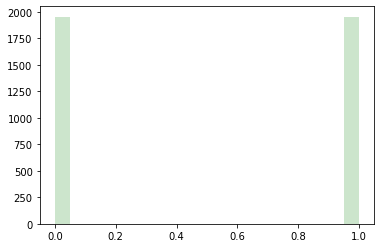

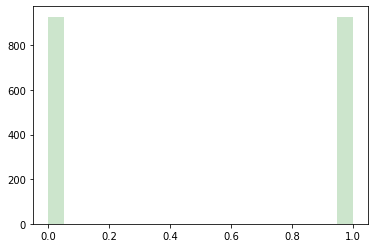

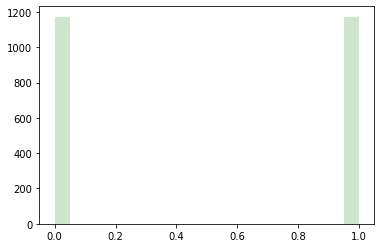

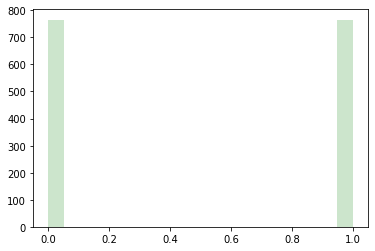

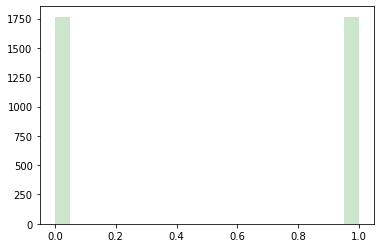

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
for column in ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]:
#     training_data_temp = training_data
#     print('\n', column)
    training_data_temp_balanced = training_data[training_data[column] != 'unsure']
    
    training_data_temp_balanced = training_data_temp_balanced[['id', 'text', column]]

#     print(training_data_temp_balanced.head())
            
    num_pos = training_data_temp_balanced[training_data_temp_balanced[column] == 1].shape[0]
    num_neg = training_data_temp_balanced[training_data_temp_balanced[column] == 0].shape[0]
    
    pos_data = training_data_temp_balanced[training_data_temp_balanced[column] == 1]
    neg_data = training_data_temp_balanced[training_data_temp_balanced[column] == 0]
#     print(neg_data.shape)

    neg_data_sample = neg_data.sample(n=num_pos, random_state=1, replace = False)
#     print('neg_data_sample', neg_data_sample.shape)

    data = pd.concat([pos_data, neg_data_sample])
    
#     data.loc[data[column] == 1, 'pos'] = 1
#     data.loc[data[column] != 1, 'neg'] = 1    
#     print(data.columns)
    data.columns = ['id', 'text', 'pos']
    data['neg'] = 1 - data['pos']
    
#     data.loc[data['pos'] == data['neg'], 'test'] = 1
#     print('malformed data?', pd.unique(data['test']))    
#     print(data.head())
#     print(neg_data_sample)
#     print(data)

    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(data['pos'], bins=20, density = False, color = 'green', alpha = 0.2)

    print(column, 'num_pos', num_pos, 'num_neg', num_neg, 'neg_data_sample', neg_data_sample.shape, data.shape)
    
    data_shuffled = data.sample(frac=1, random_state = 10)
#     data_shuffled = data.sample(frac=1)
    data_shuffled['class'] = data_shuffled['pos']
    data_shuffled = data_shuffled[['id', 'text', 'class']]
#     print(data_shuffled.head())
    
    train, val = data_shuffled[:int(.80*data_shuffled.shape[0])], data_shuffled[-int(.20*data_shuffled.shape[0]):]
    train.to_csv('/home/manuto/Documents/world_bank/bert_twitter_labor/code/twitter/data/jun3_10Klabels/data_binary_pos_neg_balanced/train_{}.csv'.format(column),index=False)
    val.to_csv('/home/manuto/Documents/world_bank/bert_twitter_labor/code/twitter/data/jun3_10Klabels/data_binary_pos_neg_balanced/val_{}.csv'.format(column),index=False)    
#     print(train.shape, val.shape)

#     print(pd.unique(train['class']))

#     print(sum(train.loc[train['class'] == 1, 'class']))
    print(
#         train.head(),
        '\ntrain pos',   train.loc[train['class'] == 1, 'class'].shape,
        '\ntrain neg', train.loc[train['class'] != 1, 'class'].shape,
        '\nval pos',   val.loc[val['class'] == 1, 'class'].shape,
        '\nval neg',   val.loc[val['class'] == 0, 'class'].shape
    )

    
#     print(train)

#     break
# training_data_temp.head()